In [128]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import ast

In [132]:
def rmeta(fname):
    ''' Reads .meta file and return information about .data file.
        Usage: rmeta(filename)
        Input:
         filename = name of the .meta file (with .meta extention)
    '''
    ifile = open(fname, 'r')
    lines = ifile.readlines()
    ifile.close()
    lines = map(str.rstrip, lines)
    lines = map(str.lstrip, lines)
    metadata = {}

    for line in lines:
        if line.startswith('simulation'):
            metadata['simulation'] = line.split("=")[1].split()[1]
        elif line.startswith('nDims'):
            metadata['nDims'] = int(line.split('=')[1].split()[1])
        elif line.startswith('dimList'):
            out_dims = ast.literal_eval(a[2].split('=')[1].lstrip())
            metadata['xdim'] = out_dims[3]
            metadata['ydim'] = out_dims[0]
            metadata['zdim'] = out_dims[6]
        elif line.startswith('dataprec'):
            metadata['datatype'] = line.split('=')[1].split()[1].lstrip('\'').rstrip('\'')
        elif line.startswith('nrecords'):
            metadata['nrecords'] = int(line.split('=')[1].split()[1])
        elif line.startswith('timeStepNumber'):
            metadata['timeStepNumber'] = int(line.split('=')[1].split()[1])
    return metadata

In [133]:
def mitbin2(filename, bswap=1, meta=None):
        '''Uses rmeta to get inforamtion about the file and return field extracted from it.
        
        Usage: mitbin2(filename, [bswap], [meta])
        
        Input:
         filename - path to the file.
         bswap - do we need a byte swap? Yes (1) or no (0) [default 1]
         meta        - None - flag to fix problem with wrong adxx*.meta files.
                         If meta = 'xx', use .meta file from xx files
        
        Output:
         nrecords*zdim*xdim*ydim numpy array of data.
        '''
        
        fd_data = open(filename, 'rb')
        if meta == None:
                metadata = rmeta(filename[:-4]+"meta")
        elif meta == 'xx':
                metadata = rmeta(filename[2:-4]+"meta")
        
        size = metadata['nrecords']*metadata['zdim']*metadata['xdim']*metadata['ydim']
        
        shape = (metadata['nrecords'],metadata['zdim'],metadata['xdim'],metadata['ydim'])
        
        data = np.fromfile(file=fd_data, dtype = metadata['datatype'], count=size)
        
        data = data.reshape(shape)
        if bswap==1:
                data = data.byteswap()
        
        #data[np.isnan(data)] = 0

        fd_data.close()
        
        return data

In [134]:
data = mitbin2('../MITgcm_c65p/verification/mytest/run/T.0000000010.data')

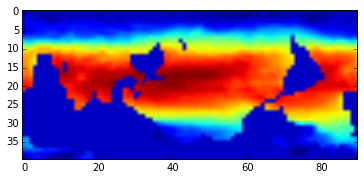

In [135]:
plt.imshow(data[0,0,:,:])

In [5]:
rmeta('../MITgcm_c65p/verification/mytest/run/T.0000000000.meta')

ValueError: invalid literal for int() with base 10: "'global_oce_latlon'"

In [27]:
ifile = open("../MITgcm_c65p/verification/mytest/run/T.0000000000.meta", 'r')
lines = ifile.readlines()
ifile.close()
lines = map(str.rstrip, lines)
lines = map(str.lstrip, lines)

In [30]:
a = ''.join(lines).split(';')

In [ ]:
Output:
         ndim                - Number of dimensions.
         xdim                - Xdim
         ydim                - Ydim
         zdim                - Zdim
         datatype                - Datatype
         nrecords                - Number of records.
         timeStepNumber        - Time step number

In [32]:
a

["simulation = { 'global_oce_latlon' }",
 'nDims = [   3 ]',
 'dimList = [90,    1,   90,40,    1,   40,15,    1,   15]',
 "dataprec = [ 'float32' ]",
 'nrecords = [     1 ]',
 'timeStepNumber = [          0 ]',
 '']

In [109]:
def rmeta(fname):
    ifile = open(fname, 'r')
    lines = ifile.readlines()
    ifile.close()
    lines = map(str.rstrip, lines)
    lines = map(str.lstrip, lines)
    metadata = {}

    for line in lines:
        if line.startswith('simulation'):
            metadata['simulation'] = line.split("=")[1].split()[1]
        elif line.startswith('nDims'):
            metadata['nDims'] = int(line.split('=')[1].split()[1])
        elif line.startswith('dimList'):
            out_dims = ast.literal_eval(a[2].split('=')[1].lstrip())
            metadata['xdim'] = out_dims[0]
            metadata['ydim'] = out_dims[3]
            metadata['zdim'] = out_dims[6]
        elif line.startswith('dataprec'):
            metadata['datatype'] = line.split('=')[1].split()[1].lstrip('\'').rstrip('\'')
        elif line.startswith('nrecords'):
            metadata['nrecords'] = int(line.split('=')[1].split()[1])
        elif line.startswith('timeStepNumber'):
            metadata['timeStepNumber'] = int(line.split('=')[1].split()[1])
    return metadata

In [111]:
rmeta("../MITgcm_c65p/verification/mytest/run/T.0000000010.meta")

{'datatype': 'float32',
 'nDims': 3,
 'nrecords': 1,
 'simulation': "'global_oce_latlon'",
 'timeStepNumber': 10,
 'xdim': 90,
 'ydim': 40,
 'zdim': 15}

In [102]:
int(a[4].split('=')[1].split()[1])

1

In [74]:


out_dims = ast.literal_eval(a[2].split('=')[1].lstrip())



In [84]:
out_dict[6]

15

In [24]:
lines

[" simulation = { 'global_oce_latlon' };",
 ' nDims = [   3 ];',
 ' dimList = [',
 '    90,    1,   90,',
 '    40,    1,   40,',
 '    15,    1,   15',
 ' ];',
 " dataprec = [ 'float32' ];",
 ' nrecords = [     1 ];',
 ' timeStepNumber = [          0 ];']

In [11]:
lines[0].rstrip()

" simulation = { 'global_oce_latlon' };"

In [22]:
lines = map(str.rstrip, lines)

[" simulation = { 'global_oce_latlon' };",
 ' nDims = [   3 ];',
 ' dimList = [',
 '    90,    1,   90,',
 '    40,    1,   40,',
 '    15,    1,   15',
 ' ];',
 " dataprec = [ 'float32' ];",
 ' nrecords = [     1 ];',
 ' timeStepNumber = [          0 ];']

In [20]:
x = []

[x for l in lines]

[[], [], [], [], [], [], [], [], [], []]

In [17]:
for l in lines:
    print l

 simulation = { 'global_oce_latlon' };

 nDims = [   3 ];

 dimList = [

    90,    1,   90,

    40,    1,   40,

    15,    1,   15

 ];

 dataprec = [ 'float32' ];

 nrecords = [     1 ];

 timeStepNumber = [          0 ];

